In [0]:
!pip install tensorflow==2.0.0 -q

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [6]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [0]:
#Model - 1
series = df['close'].values.reshape(-1,1) 

In [9]:
series.shape

(1259, 1)

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [0]:
#creating the data set
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

N = len(X)

In [17]:
N

1249

In [0]:
#Building the LSTM

i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)


model = Model(i,x)

model.compile(
    optimizer = Adam(0.1),
    loss = 'mse',
    metrics = ['accuracy']
)

In [21]:
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs = 80)

Train on 624 samples, validate on 625 samples
Epoch 1/80
624/624 [==============================] - 3s 4ms/sample - loss: 0.1725 - val_loss: 0.3546
Epoch 2/80
624/624 [==============================] - 0s 246us/sample - loss: 0.0222 - val_loss: 0.0431
Epoch 3/80
624/624 [==============================] - 0s 254us/sample - loss: 0.0073 - val_loss: 0.0316
Epoch 4/80
624/624 [==============================] - 0s 268us/sample - loss: 0.0069 - val_loss: 0.0258
Epoch 5/80
624/624 [==============================] - 0s 260us/sample - loss: 0.0064 - val_loss: 0.0257
Epoch 6/80
624/624 [==============================] - 0s 265us/sample - loss: 0.0053 - val_loss: 0.0244
Epoch 7/80
624/624 [==============================] - 0s 250us/sample - loss: 0.0061 - val_loss: 0.0318
Epoch 8/80
624/624 [==============================] - 0s 251us/sample - loss: 0.0059 - val_loss: 0.0498
Epoch 9/80
624/624 [==============================] - 0s 247us/sample - loss: 0.0060 - val_loss: 0.0292
Epoch 10/80
624/624 

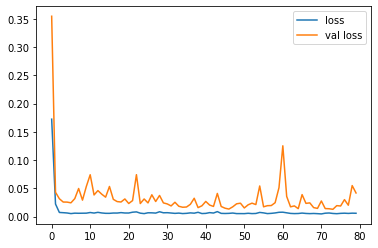

In [24]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

In [26]:
#1-step forecast
outputs = model.predict(X)
print(outputs.shape)

(1249, 1)


In [0]:
predictions = outputs[:,0]

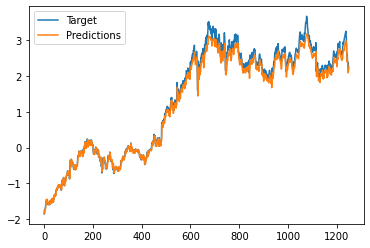

In [28]:
plt.plot(Y, label = 'Target')
plt.plot(predictions, label = 'Predictions')
plt.legend()

In [0]:
#Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] 
  validation_predictions.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p

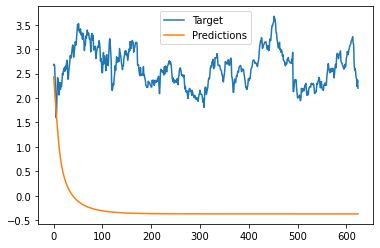

In [33]:
plt.plot(validation_target, label = 'Target')
plt.plot(validation_predictions, label = 'Predictions')
plt.legend()

#Model-2

In [4]:
#calculating return by shifting data by 1
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [0]:
df['PrevClose'] = df['close'].shift(1)

In [6]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [0]:
#calculating return
df['Returns'] = (df['close'] - df['PrevClose'])/df['PrevClose']

In [8]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Returns
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   1.,   4.,  20., 209., 739., 262.,  18.,   2.,   2.]),
 array([-0.09243697, -0.07557996, -0.05872294, -0.04186592, -0.02500891,
        -0.00815189,  0.00870513,  0.02556215,  0.04241916,  0.05927618,
         0.0761332 ]),
 <a list of 10 Patch objects>)

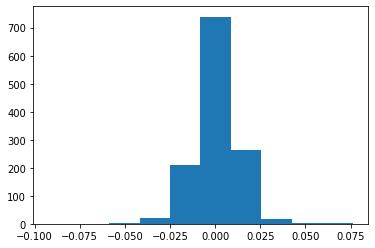

In [9]:
plt.hist(df['Returns'])

In [0]:
series = df['Returns'].values[1:].reshape(-1,1)

In [0]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten() 

In [25]:
series.shape

(1258,)

In [0]:
#creating the data set
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

N = len(X)

In [27]:
X.shape

(1248, 10, 1)

In [0]:
#Building the LSTM

i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

In [29]:
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 624 samples, validate on 624 samples
Epoch 1/80
624/624 [==============================] - 2s 4ms/sample - loss: 0.9962 - val_loss: 1.1595
Epoch 2/80
624/624 [==============================] - 0s 274us/sample - loss: 0.9912 - val_loss: 1.1442
Epoch 3/80
624/624 [==============================] - 0s 251us/sample - loss: 0.9898 - val_loss: 1.1439
Epoch 4/80
624/624 [==============================] - 0s 266us/sample - loss: 0.9869 - val_loss: 1.1404
Epoch 5/80
624/624 [==============================] - 0s 258us/sample - loss: 0.9829 - val_loss: 1.1526
Epoch 6/80
624/624 [==============================] - 0s 279us/sample - loss: 0.9843 - val_loss: 1.1419
Epoch 7/80
624/624 [==============================] - 0s 254us/sample - loss: 0.9832 - val_loss: 1.1414
Epoch 8/80
624/624 [==============================] - 0s 252us/sample - loss: 0.9857 - val_loss: 1.1378
Epoch 9/80
624/624 [==============================] - 0s 268us/sample - loss: 0.9852 - val_loss: 1.1376
Epoch 10/80
624/624 

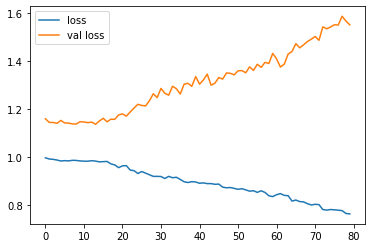

In [30]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

In [31]:
#1-step forecast
outputs = model.predict(X)
print(outputs.shape)

(1248, 1)


In [0]:
predictions = outputs[:,0]

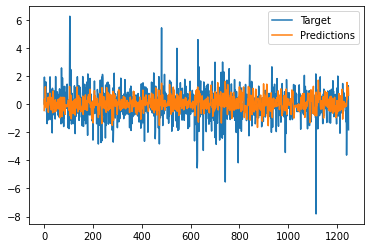

In [33]:
plt.plot(Y, label='Target')
plt.plot(predictions, label = 'Predictions')
plt.legend()

In [0]:
#Multi-step forecast

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p =  model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

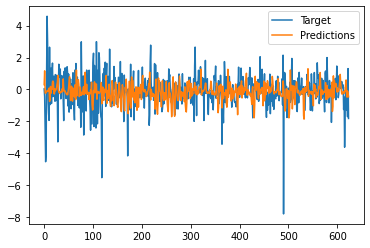

In [37]:
plt.plot(validation_target, label='Target')
plt.plot(validation_predictions, label = 'Predictions')
plt.legend()

Model - 3

In [38]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Returns
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [0]:
input_data = df[['open','high','low','close','volume']].values
target = df['Returns'].values

In [42]:
input_data.shape

5

In [0]:
#Creating the data set
T = 10
D = input_data.shape[1]
N = len(input_data) - T


In [0]:
#Normalizing the data set
Ntrain = len(input_data)*2//3
scaler.fit(input_data[:Ntrain+T-1])
input_data = scaler.transform(input_data)

In [50]:
Ntrain


839

In [0]:
#Setting up x_train and y_train

x_train = np.zeros((Ntrain,T,D))
y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  x_train[t, :, :] = input_data[t:t+T]
  y_train[t] = (target[t+T] > 0)

In [0]:
#Setting up x_test and y_test

x_test = np.zeros((Ntrain,T,D))
y_test = np.zeros(Ntrain)

for u in range(N - Ntrain):
  t = u + Ntrain
  x_test[u, :, :] = input_data[t:t+T]
  y_test[u] = (target[t+T]>0)

In [0]:
#Making the LSTM

i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(0.01),
    metrics = ['accuracy']
)

In [56]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=300)

Train on 839 samples, validate on 839 samples
Epoch 1/300
839/839 [==============================] - 2s 3ms/sample - loss: 0.7062 - accuracy: 0.4946 - val_loss: 0.7219 - val_accuracy: 0.2396
Epoch 2/300
839/839 [==============================] - 0s 342us/sample - loss: 0.6940 - accuracy: 0.5232 - val_loss: 0.7179 - val_accuracy: 0.2372
Epoch 3/300
839/839 [==============================] - 0s 366us/sample - loss: 0.6929 - accuracy: 0.5292 - val_loss: 0.7091 - val_accuracy: 0.2682
Epoch 4/300
839/839 [==============================] - 0s 355us/sample - loss: 0.6924 - accuracy: 0.5328 - val_loss: 0.7145 - val_accuracy: 0.2467
Epoch 5/300
839/839 [==============================] - 0s 337us/sample - loss: 0.6883 - accuracy: 0.5399 - val_loss: 0.7311 - val_accuracy: 0.2360
Epoch 6/300
839/839 [==============================] - 0s 333us/sample - loss: 0.6883 - accuracy: 0.5459 - val_loss: 0.7147 - val_accuracy: 0.2384
Epoch 7/300
839/839 [==============================] - 0s 338us/sample - l

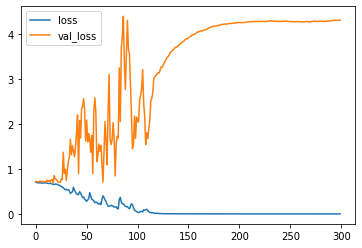

In [57]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

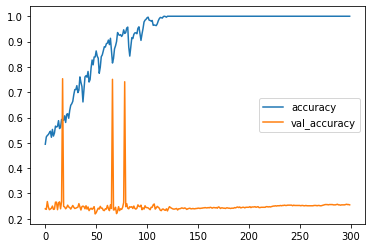

In [58]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()